In [154]:
import os
import json
import re
import pandas as pd
import seaborn as sns

Before running this notebook on a file it needs to get transformed first, since the file do not contain valid Json since the ',' character is missing which separates the table elements in the array.

In [219]:
inputFilePath = os.path.join("data", "wikipedia_0_5000.json")
outputFilePath = os.path.join("data", "wikipedia_0_5000_fixed.json")
inputFile = open(inputFilePath, "r")
outputFile = open(outputFilePath, "w")

outputFile.write('[')

previousLine = False
for tableLineJsonObject in inputFile:
    if (previousLine):
        outputFile.write(previousLine + ',')
    previousLine = tableLineJsonObject
if (previousLine):
    outputFile.write(previousLine)

outputFile.write(']')

inputFile.close()
outputFile.close()
print("Done.")

Done.


In [220]:
df = pd.read_json(os.path.join("data", "wikipedia_0_5000_fixed.json"))

Each tableData entry represents a list where each element represents a row. Each row consists of another list where each element represents a cell in the list. The following methods extract the HTML from the tableData and tableHeader column and append the result into the column named <code>HTML</code>

In [221]:
def extractRowHtml(wikiTableRow):
    extractedtdHtmlStrings = list([wikiTableCell['tdHtmlString'] for wikiTableCell in wikiTableRow])
    return '<tr>' + ''.join(extractedtdHtmlStrings) + '</tr>'

def extractTableHtml(df):
    headerRowHtmlStrings = '<thead>' + ''.join(list(map(extractRowHtml, df['tableHeaders']))) + '</thead>'
    dataRowHtmlStrings = '<tbody>' + ''.join(list(map(extractRowHtml, df['tableData']))) + '</tbody>'
    return '<table>' + headerRowHtmlStrings + dataRowHtmlStrings + '</table>'

df['HTML'] = df.apply(extractTableHtml, axis='columns')

In [222]:
df.head()

,_id,numCols,numDataRows,numHeaderRows,numericColumns,order,pgId,pgTitle,sectionTitle,tableCaption,tableData,tableHeaders,tableId,HTML
0,10000032-1,4,11,1,[1],0.535975,10000032,Mid Antrim (Northern Ireland Parliament consti...,Members of Parliament,Members of Parliament,"[[{'cellID': -1, 'textTokens': [], 'text': '',...","[[{'cellID': -1, 'textTokens': [], 'text': 'El...",1,"<table><thead><tr><th colspan=""2"" rowspan=""1"">..."
1,1000006-1,4,21,1,[],0.856769,1000006,Römer (crater),Satellite craters,Satellite craters,"[[{'cellID': -1, 'textTokens': [], 'text': 'A'...","[[{'cellID': -1, 'textTokens': [], 'text': 'Rö...",1,"<table><thead><tr><th colspan=""1"" rowspan=""1"">..."
2,10000088-1,2,1,3,[],0.318258,10000088,Whispermoon,,Track listing,"[[{'cellID': -1, 'textTokens': [], 'text': 'Al...","[[{'cellID': -1, 'textTokens': [], 'text': 'Pr...",1,"<table><thead><tr><th colspan=""2"" rowspan=""1"" ..."
3,10000218-1,2,6,1,[],0.553872,10000218,Khalsa Diwan Society Vancouver,First executive committee,First executive committee,"[[{'cellID': -1, 'textTokens': [], 'text': 'Pr...","[[{'cellID': -1, 'textTokens': [], 'text': 'Ti...",1,"<table><thead><tr><th colspan=""1"" rowspan=""1"">..."
4,10000228-1,2,7,1,[1],0.951118,10000228,Julien Leparoux,Year-end charts,Year-end charts,"[[{'cellID': -1, 'textTokens': [], 'text': 'Na...","[[{'cellID': -1, 'textTokens': [], 'text': 'Ch...",1,"<table><thead><tr><th colspan=""1"" rowspan=""1"">..."


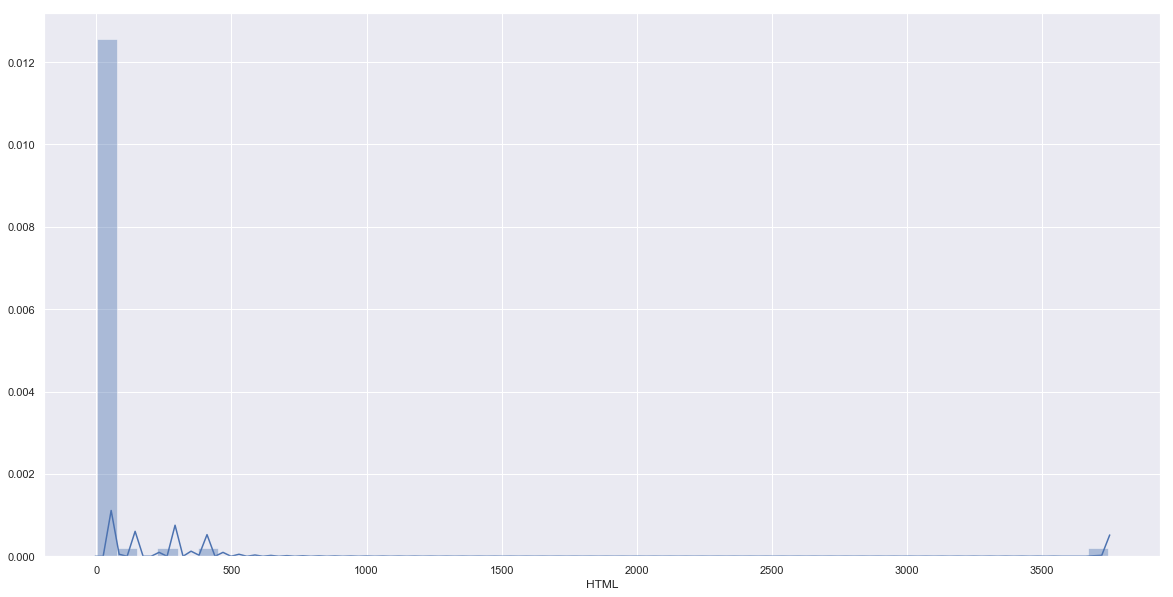

In [223]:
styleTagPerTable = df['HTML'].str.count("<bold>|<b>|<\w+? style=(\"|\').+?(\"|\').*?>", re.IGNORECASE)
styleTagPerTableGroubedByCount = styleTagPerTable.value_counts()
sns.set(rc={'figure.figsize':(20,10)})
styleTagPerTablePlot = sns.distplot(styleTagPerTableGroubedByCount)
# styleTagPerTablePlot.set_yscale('log')

In [226]:
styleTagPerTableGroubedByCount.sort_index()

0      3745
1       400
2       293
3        60
4       146
5        25
6        61
7        11
8        51
9         9
10       21
11        7
12       18
13        6
14       13
15        9
16        6
17        1
18        3
20        8
21        5
23        2
24        6
25        1
26        2
27        4
28        4
29        1
30       17
31        2
       ... 
46        2
48        2
50        4
51        1
52        1
54        1
56        2
57        1
58        1
60        3
63        3
64        2
66        2
75        1
85        1
88        1
92        1
104       1
126       1
147       1
155       1
164       1
171       1
192       1
240       2
308       1
318       1
340       1
357       1
548       1
Name: HTML, Length: 68, dtype: int64

In [227]:
print("Total number of style attributes accross all tables: " + str(styleTagPerTable.sum()))

Total number of style attributes accross all tables: 11178
